<a href="https://colab.research.google.com/github/zainamri/tugas/blob/main/retailonlineADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"

# Membaca masing-masing sheet langsung dari URL
df_2009 = pd.read_excel(url, sheet_name='Year 2009-2010')
df_2010 = pd.read_excel(url, sheet_name='Year 2010-2011')

# Menggabungkan kedua sheet
df_all = pd.concat([df_2009, df_2010], ignore_index=True)

In [92]:
# Menampilkan jumlah baris dan kolom
print(df_all.shape)
df_all.head()


(1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [93]:
# Menampilkan Info Data
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [94]:
df_all.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


Pembersihan Data

In [95]:
# Cek missing value
print("Missing Value Tiap Kolom:\n", df_all.isnull().sum())

# Buang baris tanpa Customer ID dan buat salinan aman
df_clean = df_all.dropna(subset=['Customer ID']).copy()

# Buat kolom ID dalam format string (tanpa .0)
df_clean['CustomerID_str'] = df_clean['Customer ID'].astype(int).astype(str)

# Menampilkan jumlah data setelah bersih
print("Jumlah data setelah dibersihkan:", df_clean.shape)

Missing Value Tiap Kolom:
 Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64
Jumlah data setelah dibersihkan: (824364, 9)


RFM

Buat Kolom TotalPrice

In [96]:
# Hitung total belanja per baris
df_clean.loc[:,'TotalPrice'] = df_clean['Quantity'] * df_clean['Price']

Hitung RFM

In [97]:
# Menentukan tanggal referensi (paling akhir + 1 hari)
snapshot_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)

# Hitung RFM
df_rfm = df_clean.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                     # Frequency
    'TotalPrice': 'sum'                                       # Monetary

    })

df_rfm.columns = ['Recency', 'Frequency', 'Monetary']
df_rfm = rfm.reset_index()
df_rfm.head()


,index,Customer ID,Recency,Frequency,Monetary,Cluster
0,0,12346.0,326,17,-64.68,0
1,1,12347.0,2,8,5633.32,2
2,2,12348.0,75,5,2019.40,2
3,3,12349.0,19,5,4404.54,2
4,4,12350.0,310,1,334.40,0


Statistik Deskriptif

In [98]:
print("\nStatistik Deskriptif RFM:\n")
rfm.describe()


Statistik Deskriptif RFM:



,Customer ID,Recency,Frequency,Monetary
count,5942.000000,5942.000000,5942.000000,5942.000000
mean,15316.500000,202.908617,7.552339,2801.799459
std,1715.451981,211.857936,15.972262,13973.922553
min,12346.000000,1.000000,1.000000,-25111.090000
25%,13831.250000,25.000000,2.000000,325.097500
50%,15316.500000,96.000000,4.000000,843.970000
75%,16801.750000,381.000000,8.000000,2182.005000
max,18287.000000,739.000000,510.000000,598215.220000


Visualisasi RFM

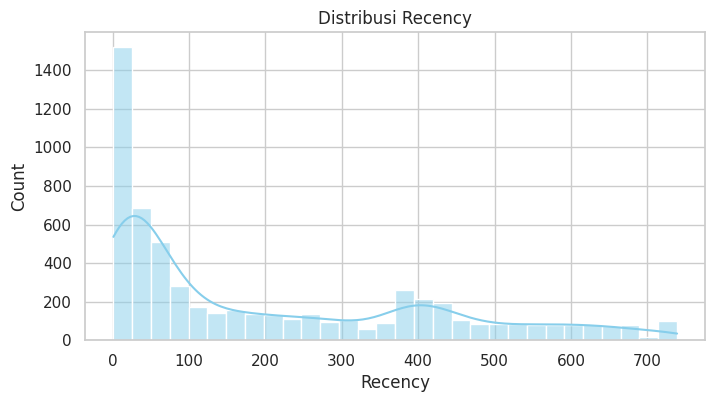

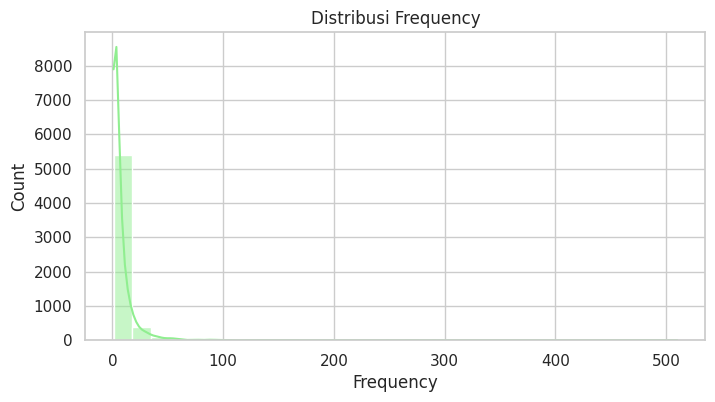

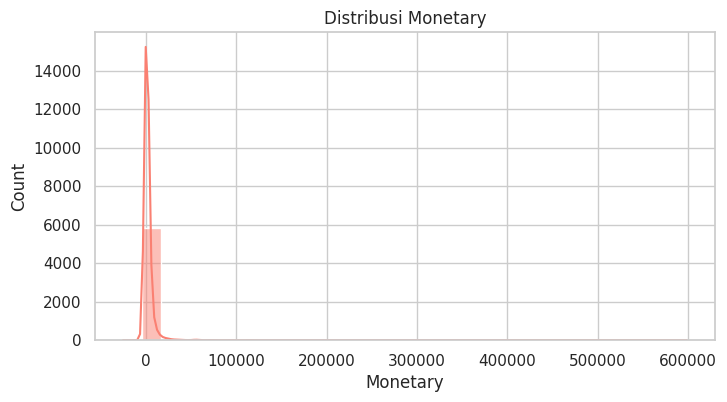

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Recency
plt.figure(figsize=(8, 4))
sns.histplot(rfm['Recency'], kde=True, bins=30, color='skyblue')
plt.title("Distribusi Recency")
plt.show()

# Frequency
plt.figure(figsize=(8, 4))
sns.histplot(rfm['Frequency'], kde=True, bins=30, color='lightgreen')
plt.title("Distribusi Frequency")
plt.show()

# Monetary
plt.figure(figsize=(8, 4))
sns.histplot(rfm['Monetary'], kde=True, bins=30, color='salmon')
plt.title("Distribusi Monetary")
plt.show()

Korelasi antar RFM (Heatmap)

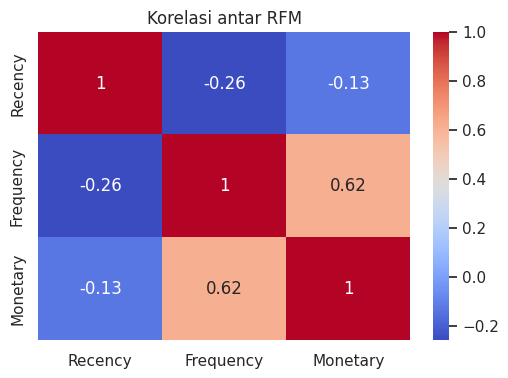

In [100]:
plt.figure(figsize=(6, 4))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar RFM")
plt.show()

Visualisasi Outlier

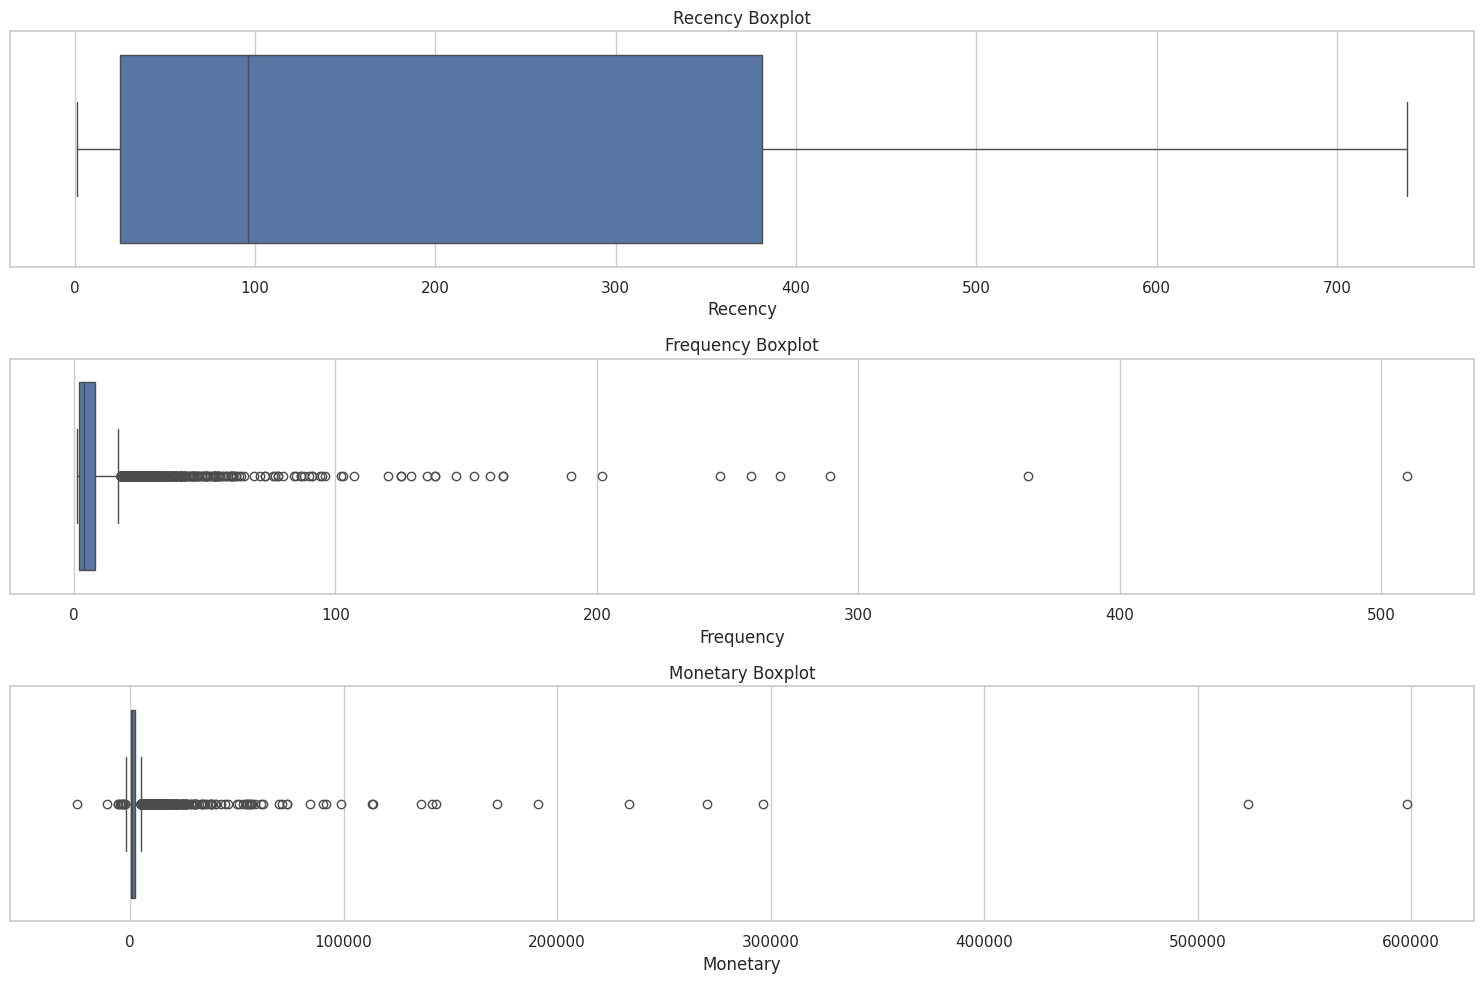

In [101]:
# Buat boxplot untuk masing-masing metrik RFM
plt.figure(figsize=(15, 10))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(3, 1, i + 1)
    sns.boxplot(x=df_rfm[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()


In [102]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Terapkan ke ketiga kolom
rfm_no_outliers = df_rfm.copy()
for col in ['Recency', 'Frequency', 'Monetary']:
    rfm_no_outliers = remove_outliers_iqr(rfm_no_outliers, col)

print("Sisa data setelah buang outlier:", rfm_no_outliers.shape)


Sisa data setelah buang outlier: (4958, 6)


Clustering K-Means

In [103]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm['Cluster'] = rfm['Cluster'].astype(str)


Visualisasi Cluster

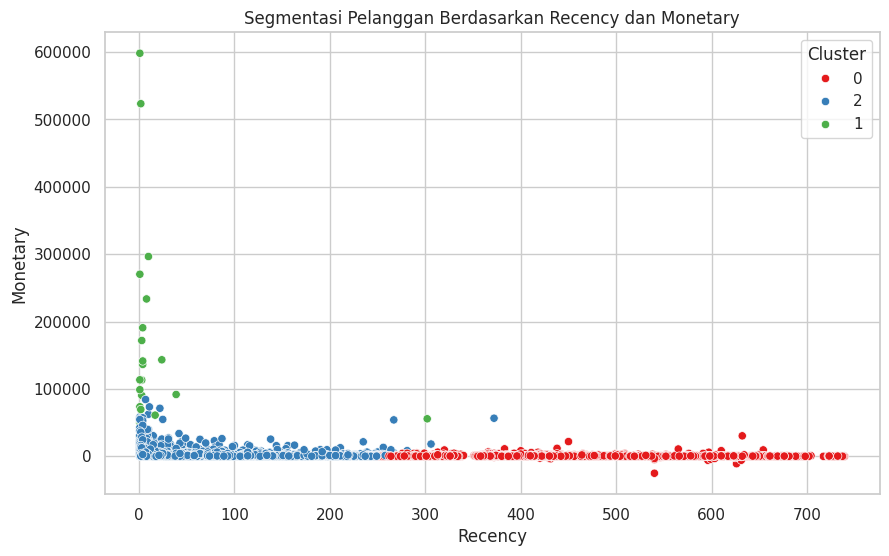

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set1')
plt.title("Segmentasi Pelanggan Berdasarkan Recency dan Monetary")
plt.show()

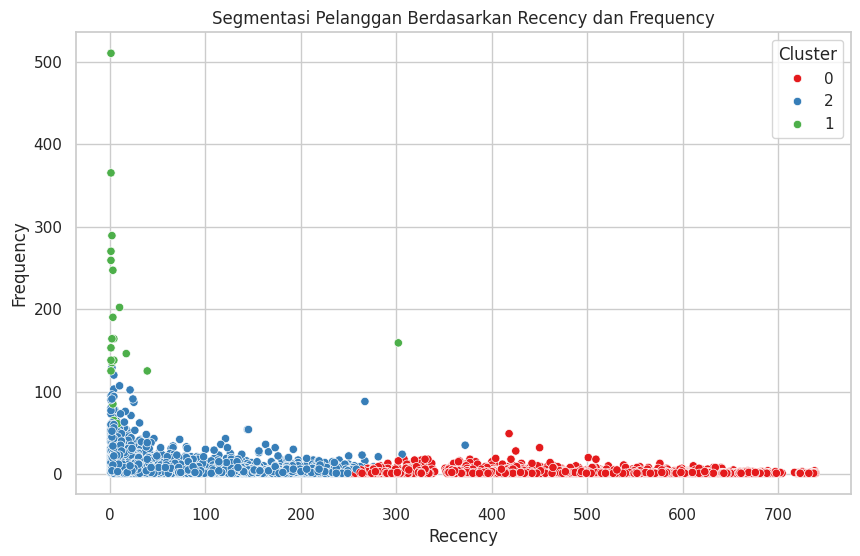

In [105]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='Set1')
plt.title("Segmentasi Pelanggan Berdasarkan Recency dan Frequency")
plt.show()

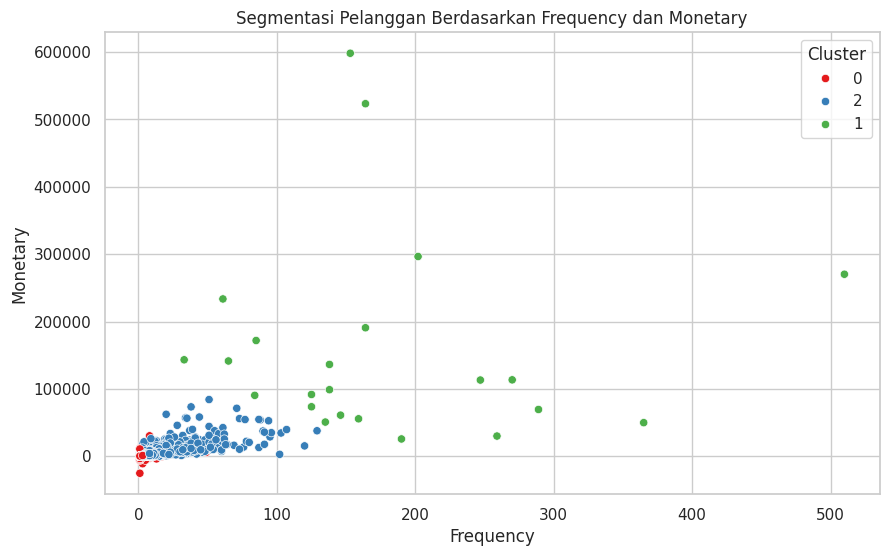

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='Set1')
plt.title("Segmentasi Pelanggan Berdasarkan Frequency dan Monetary")
plt.show()